<a href="https://www.kaggle.com/code/sohailafridi/titanic-eda-9-ml-models?scriptVersionId=195345477" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


# Data Collection
* Collect the dataset. For demonstration, we'll use the famous Titanic dataset.

In [2]:
#Let's Store the csv file into a Data Frame
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [3]:
#Reading the head of the file
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Picking any random samples
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S


# Cleaning Data
* Handle Missing Values
* Fix Structural Errors
* Remove Duplicates

In [5]:
#info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Checking for Null Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#let's the missing value of age fill with the median of others values
df['Age']=df['Age'].fillna(df['Age'].median())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#drop the Cabin columns Because its missing values is too much
df.drop(columns='Cabin',inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
#let drop the Embarked missing values
df.dropna(inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
#checking for duplicate values
df.duplicated().sum()
#Almost done Cleaning the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Data Transformation
* Convert categorical variables into numerical
* Normalization/Scaling

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
# Change the target into 0 & 1. "Female == 0" "Male == 1"
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [14]:
# Change the target into 0 & 1 & 2. "C == 0" "Q == 1" "S==2"
encoder = LabelEncoder()
df['Embarked'] = encoder.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [15]:
df = df.drop(columns=['Ticket'])
df = df.drop(columns=['Name'])

# EDA (Exploratory Data Analysis)

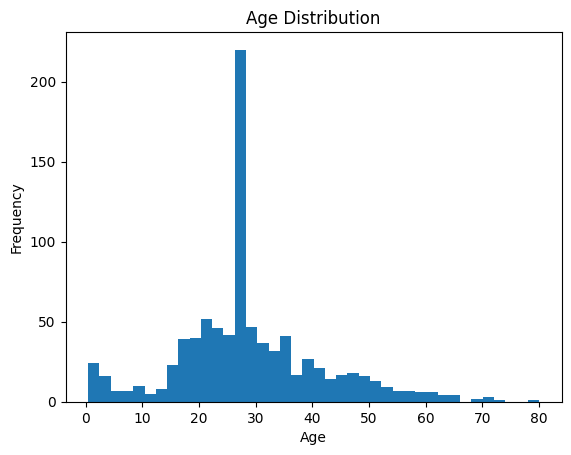

In [16]:
#Age of passengers in Titanic
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df['Age'].plot(kind='hist', bins=40)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

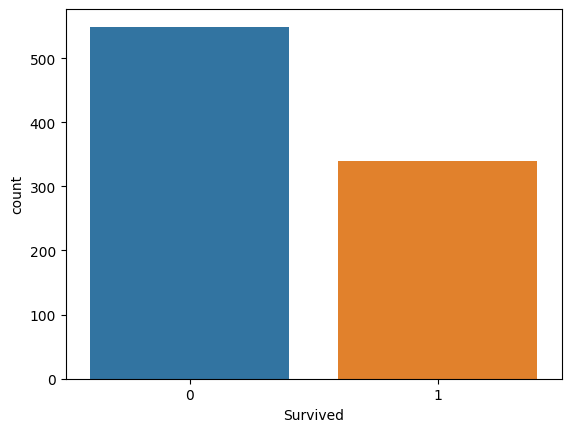

In [17]:
sns.countplot(x='Survived',data = df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


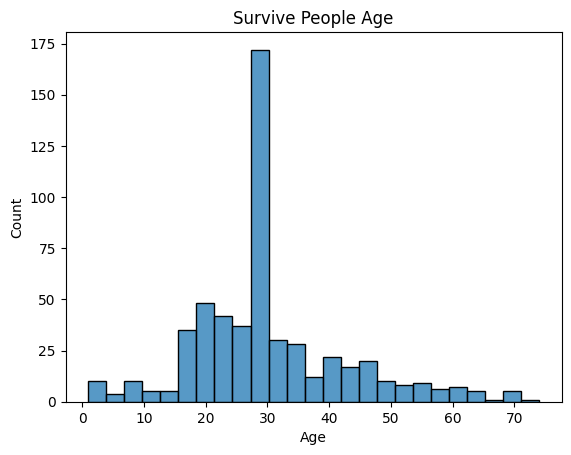

In [18]:


# Assuming 'df' is your DataFrame
df['Sex'] = df['Sex'].astype('category')
sns.histplot(df[df['Survived']==0]['Age'])
plt.title('Survive People Age')
plt.xlabel('Age')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


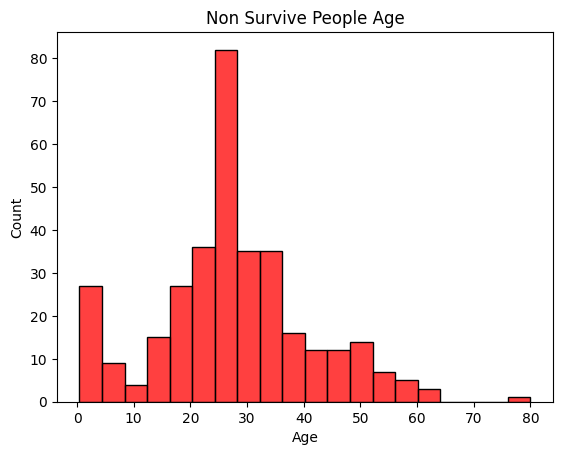

In [19]:
sns.histplot(df[df['Survived']==1]['Age'],color='red')
plt.title('Non Survive People Age')
plt.xlabel('Age')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

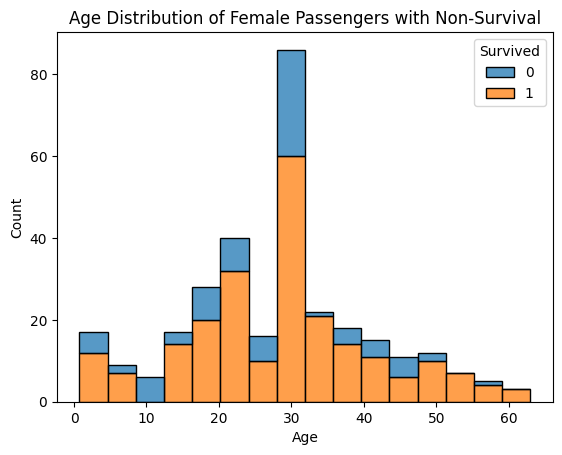

In [20]:

female_pas = df[df['Sex'] == 0]
sns.histplot(data=female_pas,x='Age',hue='Survived',multiple='stack')
plt.title('Age Distribution of Female Passengers with Non-Survival')
plt.xlabel('Age')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

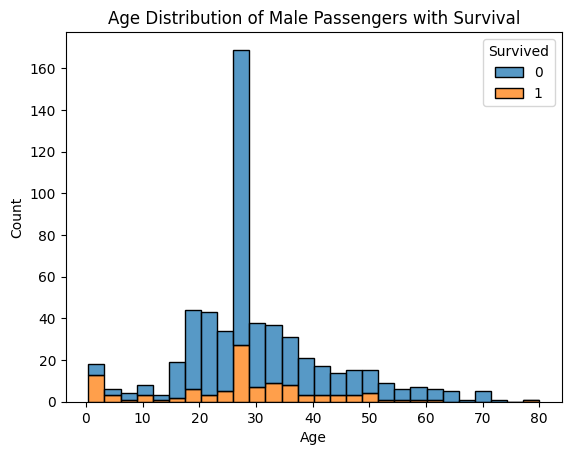

In [21]:
Male_pas = df[df['Sex'] == 1]
sns.histplot(data=Male_pas,x='Age',hue='Survived',multiple='stack')
plt.title('Age Distribution of Male Passengers with Survival')
plt.xlabel('Age')
plt.show()

In [22]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

/tmp/ipykernel_18/2872852598.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,0,0.740385
1,1,0.188908


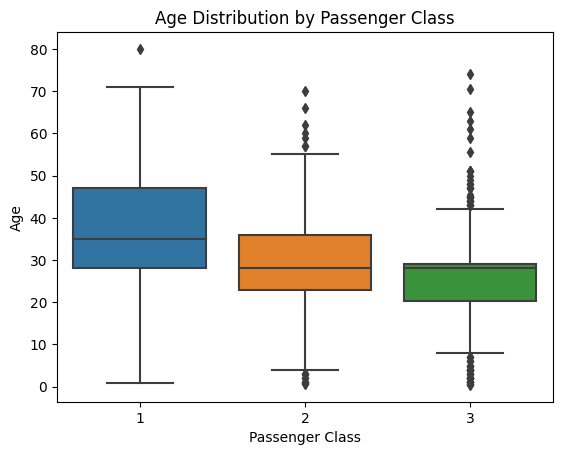

In [23]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

# Explore Bivariate Analysis
* Scatter Plot
* Correlation Matrices
* Cross-Tabulations


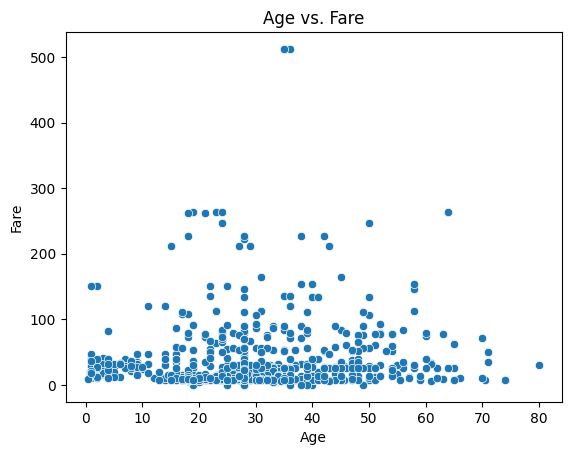

In [24]:
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

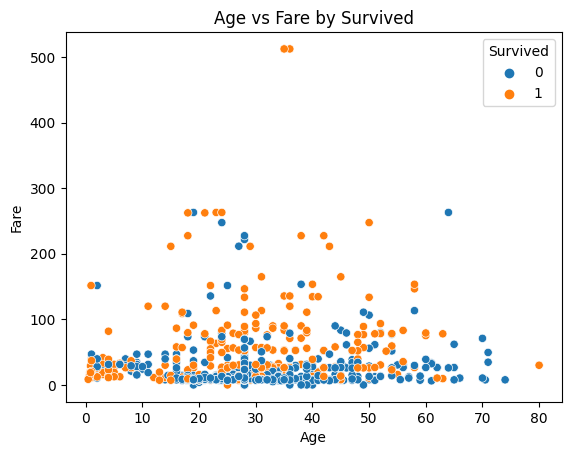

In [25]:
sns.scatterplot(x='Age',y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare by Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

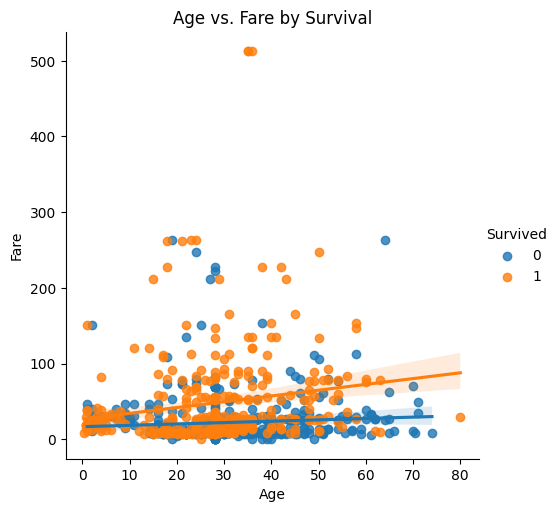

In [26]:

sns.lmplot(x='Age', y='Fare', hue='Survived', data=df, fit_reg=True)
plt.title('Age vs. Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005028 -0.035330  0.043136  0.031319 -0.057686   
Survived       -0.005028  1.000000 -0.335549 -0.541585 -0.069822 -0.034040   
Pclass         -0.035330 -0.335549  1.000000  0.127741 -0.336512  0.081656   
Sex             0.043136 -0.541585  0.127741  1.000000  0.086506 -0.116348   
Age             0.031319 -0.069822 -0.336512  0.086506  1.000000 -0.232543   
SibSp          -0.057686 -0.034040  0.081656 -0.116348 -0.232543  1.000000   
Parch          -0.001657  0.083151  0.016824 -0.247508 -0.171485  0.414542   
Fare            0.012703  0.255290 -0.548193 -0.179958  0.093707  0.160887   
Embarked        0.013166 -0.169718  0.164681  0.110320 -0.020933  0.068900   

                Parch      Fare  Embarked  
PassengerId -0.001657  0.012703  0.013166  
Survived     0.083151  0.255290 -0.169718  
Pclass       0.016824 -0.548193  0.164681  
Sex         -0.247508 -0.179958  0.110320  

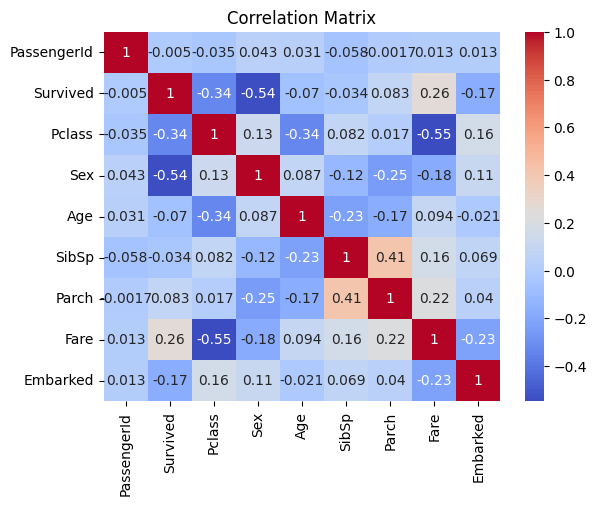

In [27]:
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

Pclass      1   2    3
Survived              
0          80  97  372
1         134  87  119


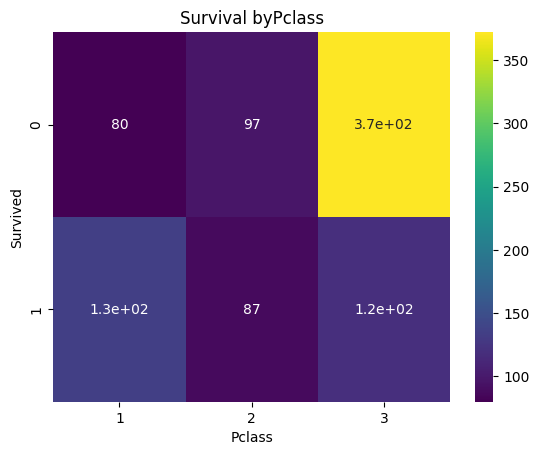

In [28]:
cross_tab = pd.crosstab(df['Survived'], df['Pclass'])

print(cross_tab)
sns.heatmap(cross_tab, annot=True, cmap='viridis')
plt.title('Survival byPclass')
plt.show()

Sex        0           1         
Pclass     1   2   3   1   2    3
Survived                         
0          3   6  72  77  91  300
1         89  70  72  45  17   47


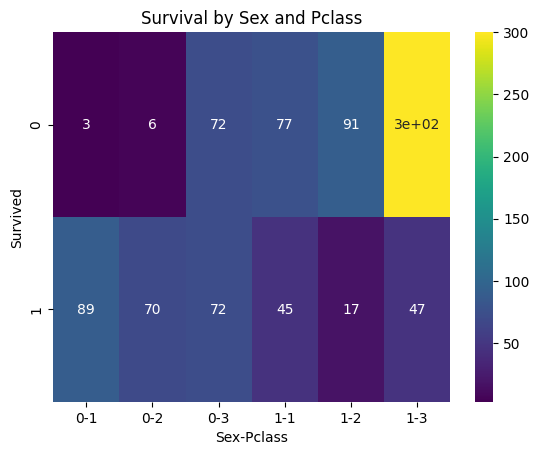

In [29]:
cross_tab = pd.crosstab(df['Survived'], [df['Sex'], df['Pclass']])
print(cross_tab)
sns.heatmap(cross_tab, annot=True, cmap='viridis')
plt.title('Survival by Sex and Pclass')
plt.show()

Pclass     1       2        3    
Survived   0   1   0   1    0   1
Embarked                         
0         26  59   8   9   41  25
1          1   1   1   2   45  27
2         53  74  88  76  286  67


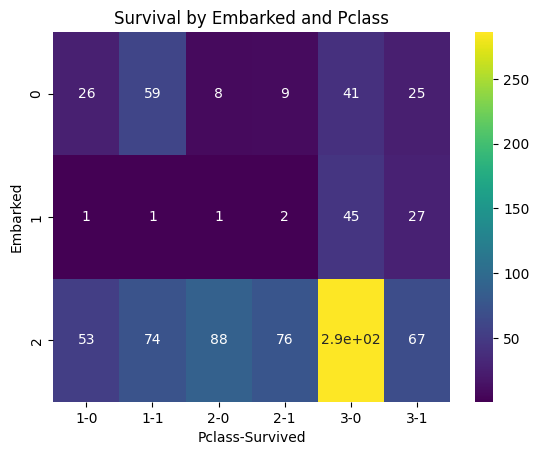

In [30]:
cross_tab = pd.crosstab(df['Embarked'], [df['Pclass'], df['Survived']])
print(cross_tab)
sns.heatmap(cross_tab, annot=True, cmap='viridis')
plt.title('Survival by Embarked and Pclass')
plt.show()

# Split data into Train and Test

In [31]:
from sklearn.model_selection import train_test_split
# Define features (independent variables) and target variable (dependent variable)
features = df.drop('Survived', axis=1)  # All columns except 'Survived'
target = df['Survived']

# Split data into training and testing sets with a test size of 20% (adjustable)
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(711, 8) (178, 8) (711,) (178,)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [33]:
lr= LogisticRegression(max_iter=500)
svc=SVC()
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
sgdc=SGDClassifier()
dtc=DecisionTreeClassifier()

# ***LogisticRegression***

In [34]:
#lets train the data by LogisticRegression
lr.fit(X_train,Y_train)
y_predit = lr.predict(X_test)
lr_acc = f"{accuracy_score(Y_test, y_predit) * 100:.2f}%"
print("Accuracy:",lr_acc)
print(confusion_matrix(Y_test,y_predit))
lr_pscore = f"{precision_score(Y_test,y_predit)* 100:.2f}%"
print("P_Score:",lr_pscore)

Accuracy: 77.53%
[[85 24]
 [16 53]]
P_Score: 68.83%


# ***Support Vector Classifier***

In [35]:
#lets train the data by SVC
svc.fit(X_train,Y_train)
y_predit = svc.predict(X_test)
svc_acc = f"{accuracy_score(Y_test, y_predit) * 100:.2f}%"
print("Accuracy:",svc_acc)
print(confusion_matrix(Y_test,y_predit))
svc_pscore = f" {precision_score(Y_test,y_predit)* 100:.2f}%"
print("P_Score:",svc_pscore)

Accuracy: 63.48%
[[106   3]
 [ 62   7]]
P_Score:  70.00%


# ***RandomForestClassifier***

In [36]:
#lets train the data by RFC
rfc.fit(X_train,Y_train)
y_predit = rfc.predict(X_test)
rfc_acc = f"{accuracy_score(Y_test, y_predit) * 100:.2f}%"
print("Accuracy:",rfc_acc)
print(confusion_matrix(Y_test,y_predit))
rfc_pscore = f" {precision_score(Y_test,y_predit)* 100:.2f}%"
print("P_Score:",rfc_pscore)

Accuracy: 78.65%
[[90 19]
 [19 50]]
P_Score:  72.46%


# ***KNeighborsClassifier***

In [37]:
#lets train the data by knn
knn.fit(X_train,Y_train)
y_predit = knn.predict(X_test)
knn_acc = f"{accuracy_score(Y_test, y_predit) * 100:.2f}%"
print("Accuracy:",knn_acc)
print(confusion_matrix(Y_test,y_predit))
knn_pscore = f" {precision_score(Y_test,y_predit)* 100:.2f}%"
print("P_Score:",knn_pscore)

Accuracy: 62.36%
[[89 20]
 [47 22]]
P_Score:  52.38%


# ***GaussianNB***

In [38]:
#lets train the data by GNB
gb.fit(X_train,Y_train)
y_predit = gb.predict(X_test)
gb_acc = f"{accuracy_score(Y_test, y_predit) * 100:.2f}%"
print("Accuracy:",gb_acc)
print(confusion_matrix(Y_test,y_predit))
gb_pscore = f" {precision_score(Y_test,y_predit)* 100:.2f}%"
print("P_Score:",gb_pscore)

Accuracy: 77.53%
[[85 24]
 [16 53]]
P_Score:  68.83%


# ***MultinomialNB***

In [39]:
#lets train the data by MNB
mnb.fit(X_train,Y_train)
y_predit = mnb.predict(X_test)
mnb_acc = f"{accuracy_score(Y_test, y_predit) * 100:.2f}%"
print("Accuracy:",mnb_acc)
print(confusion_matrix(Y_test,y_predit))
mnb_pscore = f" {precision_score(Y_test,y_predit)* 100:.2f}%"
print("P_Score:",mnb_pscore)

Accuracy: 69.10%
[[88 21]
 [34 35]]
P_Score:  62.50%


# ***BernoulliNB***

In [40]:
#lets train the data by BNB
bnb.fit(X_train,Y_train)
y_predit = bnb.predict(X_test)
bnb_acc = f"{accuracy_score(Y_test, y_predit) * 100:.2f}%"
print("Accuracy:",bnb_acc)
print(confusion_matrix(Y_test,y_predit))
bnb_pscore = f" {precision_score(Y_test,y_predit)* 100:.2f}%"
print("P_Score:",bnb_pscore)

Accuracy: 78.65%
[[87 22]
 [16 53]]
P_Score:  70.67%


# ***Stochastic Gradient Descent Classifier***

In [41]:
#lets train the data by SGDC
sgdc.fit(X_train,Y_train)
y_predit = sgdc.predict(X_test)
sgdc_acc = f"{accuracy_score(Y_test, y_predit) * 100:.2f}%"
print("Accuracy:",sgdc_acc)
print(confusion_matrix(Y_test,y_predit))
sgdc_pscore = f" {precision_score(Y_test,y_predit)* 100:.2f}%"
print("P_Score:",sgdc_pscore)

Accuracy: 69.66%
[[97 12]
 [42 27]]
P_Score:  69.23%


# ***DecisionTreeClassifier***

In [42]:
#lets train the data by DTC
dtc.fit(X_train,Y_train)
y_predit = dtc.predict(X_test)
dtc_acc = f"{accuracy_score(Y_test, y_predit) * 100:.2f}%"
print("Accuracy:",dtc_acc)
print(confusion_matrix(Y_test,y_predit))
dtc_pscore = f" {precision_score(Y_test,y_predit)* 100:.2f}%"
print("P_Score:",dtc_pscore)

Accuracy: 73.60%
[[80 29]
 [18 51]]
P_Score:  63.75%


In [43]:
models = pd.DataFrame({
    'Model': ['Support Vector Classifier', 'KNN', 'Logistic Regression', 
              'Random Forest Classifier', 'GaussianNB', 'MultinomialNB', 
              'Stochastic Gradient Descent Classifier', 'BernoulliNB', 
              'Decision Tree Classifier'],
    'Accuracy Score': [svc_acc, knn_acc, lr_acc, 
              rfc_acc, gb_acc, mnb_acc, 
              sgdc_acc, bnb_acc, dtc_acc],
'Precission Score': [svc_pscore, knn_pscore, lr_pscore, 
              rfc_pscore, gb_pscore, mnb_pscore, 
              sgdc_pscore, bnb_pscore, dtc_pscore]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score,Precission Score
3,Random Forest Classifier,78.65%,72.46%
7,BernoulliNB,78.65%,70.67%
2,Logistic Regression,77.53%,68.83%
4,GaussianNB,77.53%,68.83%
8,Decision Tree Classifier,73.60%,63.75%
6,Stochastic Gradient Descent Classifier,69.66%,69.23%
5,MultinomialNB,69.10%,62.50%
0,Support Vector Classifier,63.48%,70.00%
1,KNN,62.36%,52.38%
